# Fixed Asset Allocation Portfolios

- Four Seasons Portfolio
- All Weather Portfolio
- Traditional Stocks 60% Bonds 40% Portfolio
- Permanent Portfolio
- Equal Weight Custom Portfolio

In [1]:
fixed_asset_allocation = {'Four Seasons': {'assets': ['VTI', 'TLT', 'IEF', 'GLD', 'DBC'],
                                         'weights': np.array([0.3, 0.4, 0.15, 0.075, 0.075])},
                          'All Weather': {'assets': ['VT', 'LTPZ', 'EDV', 'VCLT', 'EMLC', 'IAU', 'BCI'],
                                         'weights': np.array([0.35, 0.2, 0.2, 0.075, 0.075, 0.05, 0.05])},
                         'Sixty Forty': {'assets': ['VTI', 'BND'],
                                        'weights': np.array([0.6, 0.4])},
                         'Permanent': {'assets': ['VTI', 'IEF', 'TLT', 'GLD'],
                                      'weights': np.array([0.25, 0.25, 0.25, 0.25])},
                         'SPY': {'assets': ['SPY'],
                                      'weights': np.array([1])}}

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from src.fmp import get_monthly_prices

## Retrieve historical prices

In [3]:
combined = []

for portfolio in fixed_asset_allocation.keys():
    combined = combined + fixed_asset_allocation[portfolio]['assets']

combined_assets = list(set(combined))
combined_assets

['GLD',
 'LTPZ',
 'EDV',
 'VT',
 'IAU',
 'VCLT',
 'EMLC',
 'VTI',
 'DBC',
 'BCI',
 'BND',
 'TLT',
 'IEF',
 'SPY']

In [4]:
prices = pd.DataFrame()
for asset in combined_assets:
    prices[asset] = get_monthly_prices(asset)[asset]
prices

,GLD,LTPZ,EDV,VT,IAU,VCLT,EMLC,VTI,DBC,BCI,BND,TLT,IEF,SPY
2004-11-30,45.12,NaN,NaN,NaN,NaN,NaN,NaN,57.450001,NaN,NaN,NaN,86.940002,84.500000,117.889999
2004-12-31,43.80,NaN,NaN,NaN,NaN,NaN,NaN,59.025002,NaN,NaN,NaN,88.550003,84.949997,120.870003
2005-01-31,42.22,NaN,NaN,NaN,8.454000,NaN,NaN,57.549999,NaN,NaN,NaN,91.709999,85.690002,118.160004
2005-02-28,43.53,NaN,NaN,NaN,8.722000,NaN,NaN,58.750000,NaN,NaN,NaN,90.019997,84.260002,120.629997
2005-03-31,42.82,NaN,NaN,NaN,8.576000,NaN,NaN,57.430000,NaN,NaN,NaN,89.330002,83.690002,117.959999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,165.66,82.06,128.46,101.31,33.700001,102.629997,31.11,217.100000,17.91,25.20,85.260002,138.639999,113.989998,417.299988
2021-05-28,178.38,83.82,128.32,102.91,36.259998,103.089996,31.87,218.090000,18.60,25.84,85.260002,138.440002,114.400002,420.040009
2021-06-30,165.63,86.40,135.35,103.61,33.710000,106.940002,31.38,222.820000,19.25,26.37,85.889999,144.350006,115.489998,428.060000
2021-07-30,169.82,89.66,141.34,104.25,34.560000,109.010002,31.11,226.690000,19.50,26.77,86.760002,149.520004,117.709999,438.510000


## Portfolio Performance Summary

In [5]:
stats_summary = pd.DataFrame(columns = ['Portfolio', 'CAGR (%)', 'MDD (%)', 'CAGR / MDD'])

combined_cumulatives = pd.DataFrame()

for portfolio in fixed_asset_allocation.keys():
    
    port_data = pd.DataFrame()
    
    # get corresponding price data
    for column in prices.columns:
        if column in fixed_asset_allocation[portfolio]['assets']:
            port_data[column] = prices[column]
    
    # compute daily returns of individual assets
    daily_returns = port_data.pct_change()
    
    # compute daily returns of the portfolio    
    daily_returns[portfolio] = daily_returns.dot(fixed_asset_allocation[portfolio]['weights'])
    
    # compute cumulative returns
    cumulative_returns = (1 + daily_returns).cumprod()
    cumulative_returns.fillna(1, inplace=True)
    
    # print(cumulative_returns)
    
    # save cumulative returns of the portfolio for comparison
    
    if portfolio == 'All Weather':
        allWeather = cumulative_returns
    
    if portfolio == 'Sixty Forty':
        sixtyForty = cumulative_returns
    
    if portfolio == 'Permanent':
        permanent = cumulative_returns
    
    combined_cumulatives[portfolio] = cumulative_returns[portfolio]    
    
    # compute CAGR
    first_value = cumulative_returns[portfolio][0]
    last_value = cumulative_returns[portfolio][-1]  
    years = len(cumulative_returns.index)/12    
    cagr = (last_value/first_value)**(1/years) - 1

    # compute MDD
    cumulative_returns = cumulative_returns[portfolio]
    previous_peaks = cumulative_returns.cummax()
    drawdown = (cumulative_returns - previous_peaks) / previous_peaks
    #drawdown.plot()
    portfolio_mdd = drawdown.min()
    
    # save CAGR and MDD for each portfolio
    
    stats_summary = stats_summary.append({'Portfolio': portfolio,
                                         'CAGR (%)': cagr * 100,
                                         'MDD (%)': portfolio_mdd* 100,
                                         'CAGR / MDD': abs(cagr / portfolio_mdd).round(2)}, ignore_index=True)

combined_cumulatives.index = pd.to_datetime(combined_cumulatives.index)

In [6]:
stats_summary.set_index('Portfolio', inplace=True)
stats_summary.sort_values('CAGR / MDD', ascending=False)

,CAGR (%),MDD (%),CAGR / MDD
Portfolio,,,
Permanent,6.153095,-14.615093,0.42
Four Seasons,6.144904,-27.285812,0.23
All Weather,1.842911,-10.459190,0.18
SPY,8.304832,-52.195278,0.16
Sixty Forty,4.824342,-34.923560,0.14


## Portfolio Performance Visualization

Text(0.5, 1.0, 'Portfolio Performance Comparison')

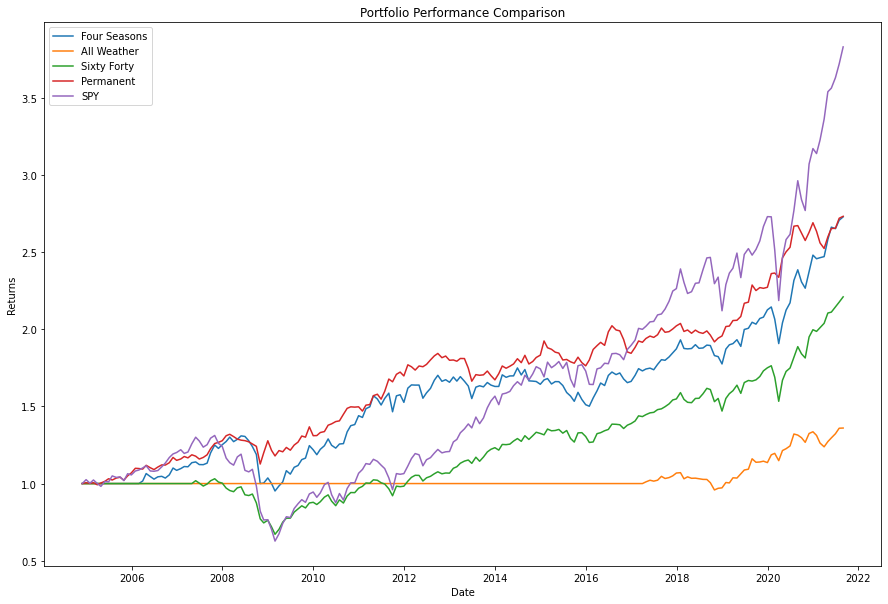

In [7]:
plt.figure(figsize=(15,10))
plt.plot(combined_cumulatives)
plt.legend(combined_cumulatives.columns)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Portfolio Performance Comparison')

## All Weather Portfolio

Text(0.5, 1.0, 'All Weather Portfolio')

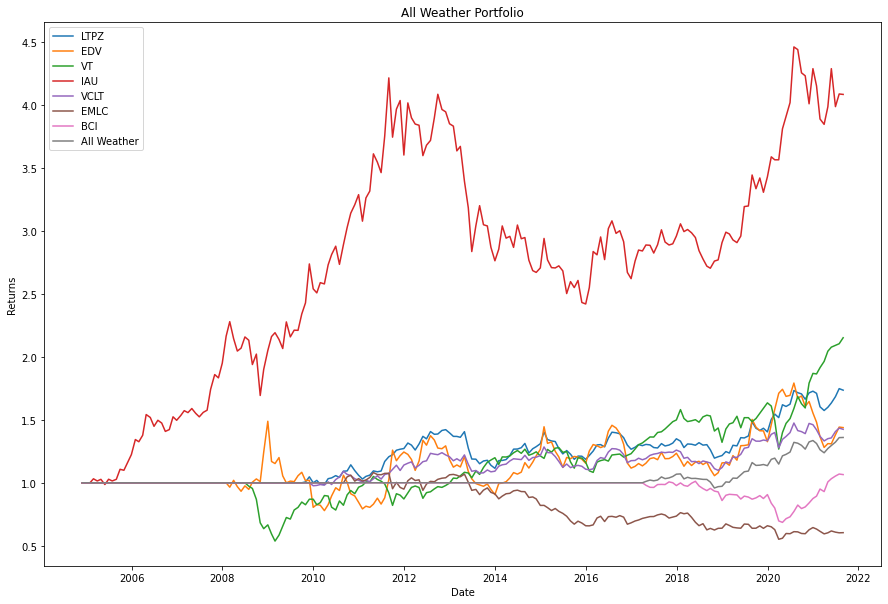

In [8]:
plt.figure(figsize=(15,10))
allWeather.index = pd.to_datetime(allWeather.index)
plt.plot(allWeather)
plt.legend(allWeather.columns)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('All Weather Portfolio')

## Permanent Portfolio

Text(0.5, 1.0, 'Permanent Portfolio')

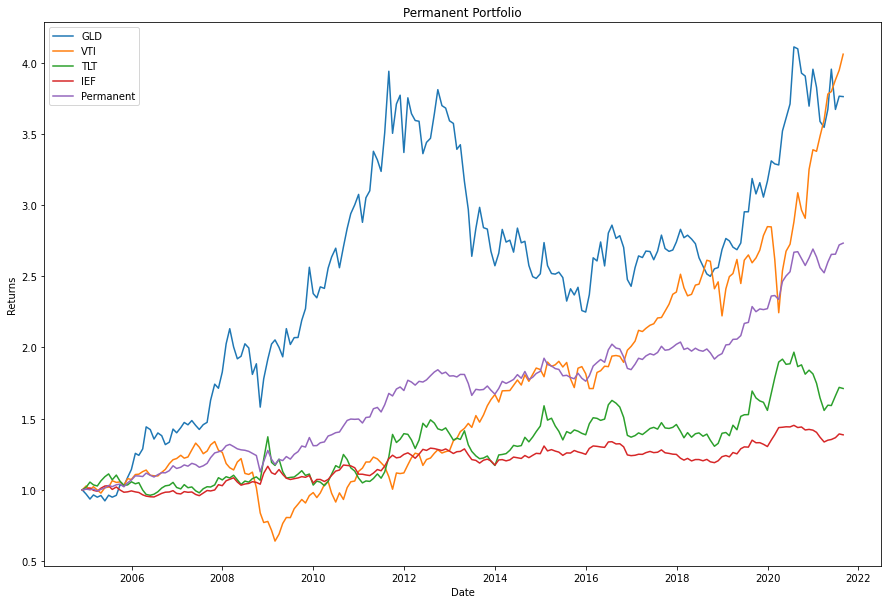

In [9]:
plt.figure(figsize=(15,10))
permanent.index = pd.to_datetime(permanent.index)
plt.plot(permanent)
plt.legend(permanent.columns)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Permanent Portfolio')

## Traditonal 60% Equity + 40% Bond Portfolio

Text(0.5, 1.0, '60% Equity 40% Bond Portfolio')

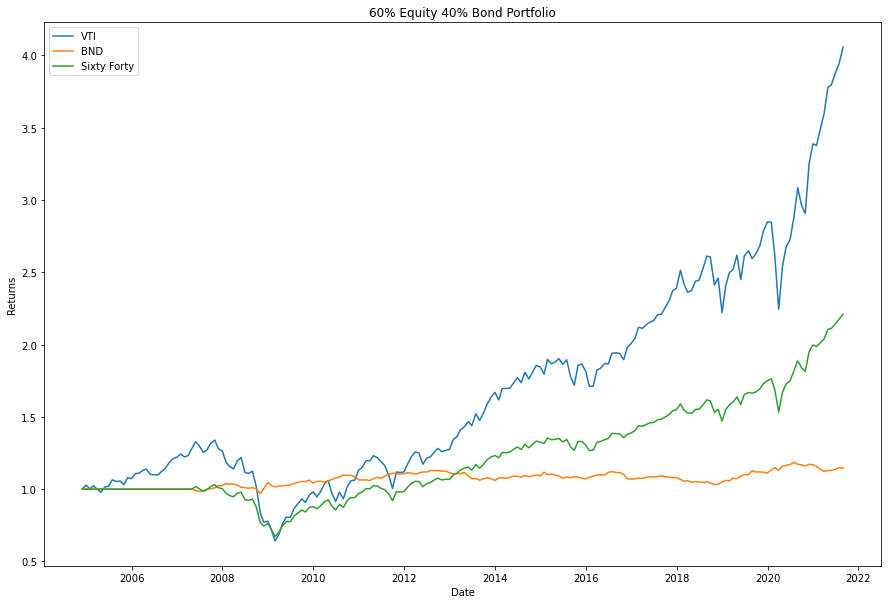

In [10]:
plt.figure(figsize=(15,10))
sixtyForty.index = pd.to_datetime(sixtyForty.index)
plt.plot(sixtyForty)
plt.legend(sixtyForty.columns)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('60% Equity 40% Bond Portfolio')